# Global EV Sales: 2010-2024

- Historically, EVs have come and gone. Are they here to stay?

---

### About the Dataset

Electric Vehicles (EVs) are transforming the transportation landscape, marking a pivotal shift from traditional gasoline and diesel-powered vehicles. Unlike their internal combustion engine (ICE) counterparts, EVs operate on electric motors powered by rechargeable batteries. These batteries can be charged via standard electrical outlets or specialized charging stations, making EVs a versatile and sustainable option for modern mobility.

The increasing popularity of EVs is driven by their numerous environmental and economic benefits. With zero tailpipe emissions, EVs contribute significantly to improved air quality and the reduction of greenhouse gases, aligning with global efforts to combat climate change. Additionally, EVs offer lower operating costs due to cheaper electricity and reduced maintenance needs, thanks to their fewer moving parts.

Advancements in battery technology have further accelerated the adoption of EVs, with improvements in driving range and charging times making them more practical for everyday use. As a result, EVs are playing an increasingly important role in the global shift toward sustainable transportation.

#### Understanding the EV Powertrain

An EV powertrain is the system that generates and delivers power to the wheels, enabling the vehicle to move. This system differs significantly from traditional ICE vehicles, which rely on fossil fuels for power. The key components of an EV powertrain include:

- **Battery Pack**: The primary energy source for the electric motor, the battery pack stores electrical energy. Its capacity is a critical factor in determining the vehicle’s driving range.
  
- **Electric Motor**: This component converts electrical energy from the battery into mechanical energy to drive the wheels. EVs can feature one or more electric motors, depending on whether the vehicle is designed for front-wheel, rear-wheel, or all-wheel drive.
  
- **Power Electronics Controller**: This device manages the flow of electricity between the battery and the electric motor, controlling motor speed and torque. It also handles regenerative braking, which recaptures energy during braking and returns it to the battery.
  
- **Transmission**: While some EVs use a simple transmission to connect the motor to the wheels, many utilize a direct drive system that eliminates the need for a multi-speed gearbox.
  
- **Inverter**: The inverter converts direct current (DC) from the battery into alternating current (AC) needed by the electric motor.

EV powertrains are designed with varying focuses, from efficiency and extended range to high performance and power, depending on the manufacturer’s goals and the vehicle’s intended use.

### Provenance

#### Sources

- [International Energy Agency (IEA) - Global EV Data 2024](https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#global-ev-data)

#### Collection Methodology

The dataset was sourced from the IEA's official website and downloaded as 'IEA Global EV Data 2024 2.csv.'

#### License

This work is licensed under the [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/). You are free to share, copy, and redistribute the material in any medium or format, and adapt, remix, transform, and build upon the material for any purpose, even commercially, as long as appropriate credit is given.

In [66]:
# Load Libraries and Modules.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [67]:
# Load EV Data
ev_data = pd.read_csv("IEA Global EV Data 2024.csv")

In [68]:
# Preview data.
ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


---

## Data Information

Some immediate insights are:

- **EV Adoption Trends**: There is a noticeable increase in EV stock share across most regions, indicating growing adoption rates over recent years.
  
- **Regional Differences**: Certain regions, particularly those with strong environmental policies, show significantly higher EV sales shares, reflecting regional efforts to promote sustainable transportation.
  
- **Powertrain Popularity**: Battery Electric Vehicles (BEVs) appear to dominate the market, with a larger share compared to Plug-in Hybrid Electric Vehicles (PHEVs), suggesting a preference for fully electric solutions.
  
- **Growth Momentum**: The year-over-year growth in EV stock share and sales share is more pronounced in regions with established infrastructure, indicating that infrastructure plays a critical role in accelerating EV adoption.
  
- **Market Maturity**: The data suggests that some markets are reaching a level of maturity, where growth rates are stabilizing, whereas emerging markets are experiencing rapid increases in EV adoption.

These insights provide a foundational understanding of the current state of the EV market, setting the stage for a deeper analysis.

---

In [70]:
ev_data.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [71]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [72]:
# Do columns have missing data?
ev_data.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [73]:
print(ev_data.describe())

               year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08


In [74]:
print(ev_data['parameter'].describe())

count        12654
unique           8
top       EV stock
freq          3470
Name: parameter, dtype: object


In [75]:
print(ev_data['parameter'])

0            EV stock share
1            EV sales share
2                  EV sales
3                  EV stock
4                  EV stock
                ...        
12649        EV sales share
12650        EV stock share
12651    EV charging points
12652    EV charging points
12653        EV stock share
Name: parameter, Length: 12654, dtype: object


---

## Data Quality Assessment

As I delve into this dataset, it’s clear that while there’s a wealth of information available, there are also some gaps and inconsistencies that need to be addressed before diving into the analysis.

### What’s Missing?

Granular Regional Data: While the dataset provides valuable insights at a high level, some regions could benefit from more detailed breakdowns. For example, city-level data could offer a more precise understanding of EV adoption patterns, especially in densely populated areas where infrastructure might differ significantly within the same region.

Consumer Demographics: Understanding who is buying EVs could add a layer of richness to the analysis. Data on consumer age, income, and preferences would help in identifying the driving forces behind EV adoption in different regions.

### What Needs Cleaning and Tidying?

Inconsistent Date Formats: A quick glance reveals that the dates aren’t uniformly formatted, which could lead to issues when trying to plot time series data or calculate growth rates. Standardizing these dates will be an essential first step in ensuring accuracy.

Missing Values: There are a few gaps in the dataset, particularly in regions where EV adoption is still in its infancy. While some missing data is to be expected, especially in emerging markets, handling these gaps carefully—whether through imputation or acknowledgment in the analysis—will be critical.

Duplicate Entries: Some rows appear to be duplicated, potentially skewing the results if not addressed. Identifying and removing these duplicates will help maintain the integrity of the analysis.

Categorical Consistency: There are slight variations in how some categorical data, such as powertrain types or region names, are labeled. Standardizing these labels will ensure that the analysis remains consistent and accurate.

Cleaning and tidying this data isn’t just a routine step; it’s an opportunity to get intimately familiar with the dataset. By addressing these issues upfront, I’m setting the stage for a more robust and insightful analysis that truly reflects the current state of the EV market.

---

In [77]:
# Data wrangling, tidying, clearning of columns.

# First, we're going to filter down our data to focus on the EV stock share—this is where the real story lies.
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share']

# Let’s take a quick peek at the overall summary stats—because understanding our data is key to telling the right story.
ev_data['parameter'].describe()

# Time to give our columns a makeover: converting them to snake_case for that clean, professional look.
ev_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in ev_data.columns]

# Now we're ready to dive deep with data that’s polished and ready for analysis!

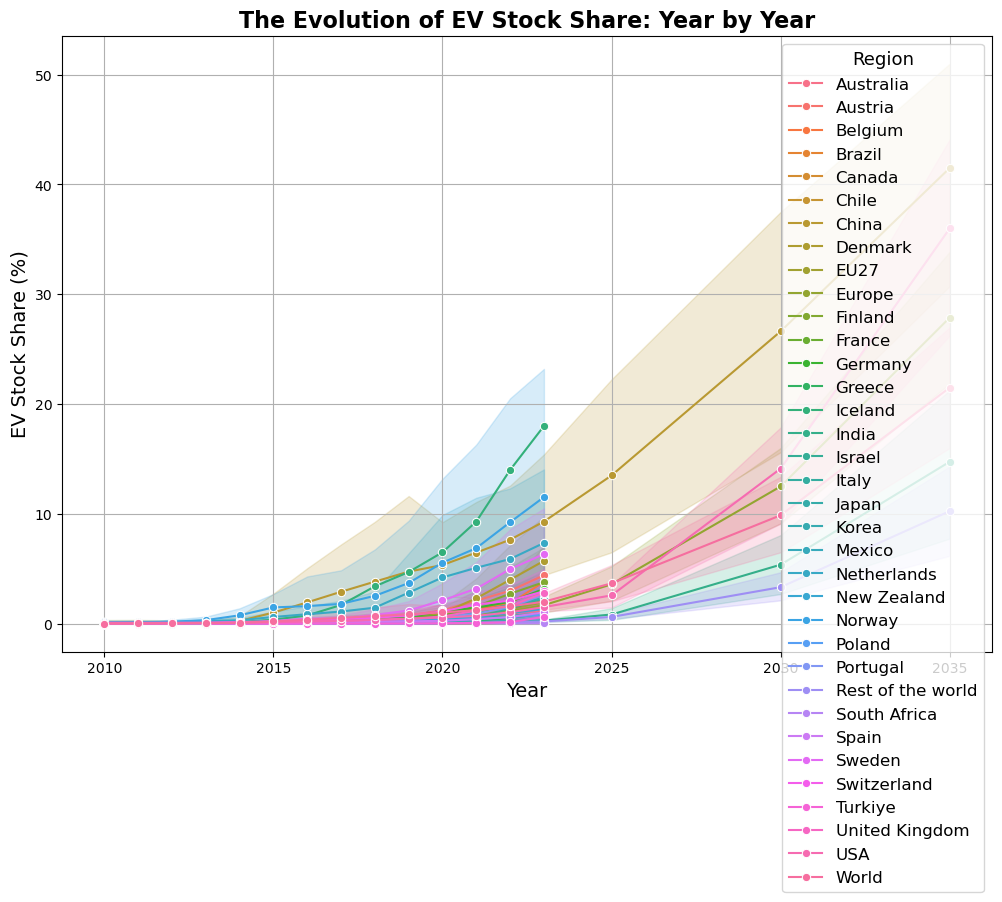

<Figure size 640x480 with 0 Axes>

In [78]:
# Let's take a journey through time and see how EV stock shares have evolved over the years!
plt.figure(figsize=(12, 8))

# Drawing the lines of progress, with a splash of color for each region
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')

# Giving our visualization a title that's as dynamic as the EV market
plt.title('The Evolution of EV Stock Share: Year by Year', fontsize=16, fontweight='bold')

# Labeling our axes so we know exactly what we're looking at
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Stock Share (%)', fontsize=14)

# A legend that tells the story of each region's journey
plt.legend(title='Region', title_fontsize='13', fontsize='12')

# Adding a grid for a crisp, organized look 
plt.grid(True)

# Create!
plt.show()
plt.clf()

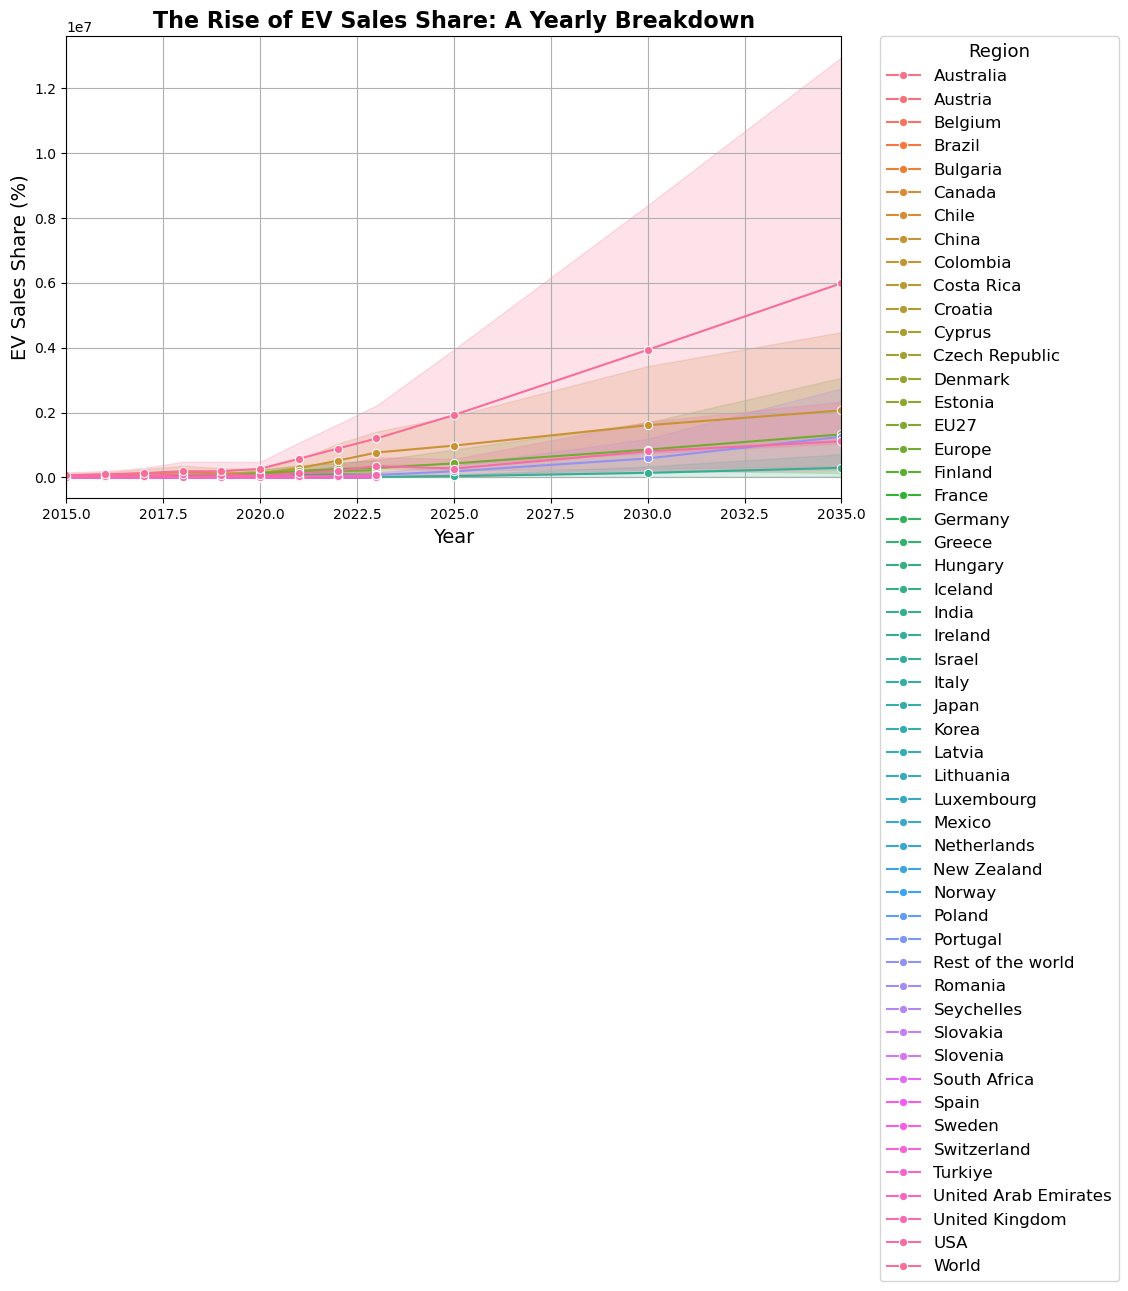

<Figure size 640x480 with 0 Axes>

In [79]:
# As a self-taught data analyst, I've mastered the art of transforming raw data into compelling stories. 
# Let's dive into the data and uncover the narrative behind EV sales share.

# Step 1: Focus on what matters—filtering the data to zero in on EV sales.
ev_sales_share = ev_data[ev_data['parameter'] == 'EV sales']

# Step 2: Visualize the journey of EV sales share across the years—because a picture speaks a thousand data points.
plt.figure(figsize=(10, 6))  # Slightly smaller figure size for a more compact visualization

# A clean, sharp line plot that captures the rise of EVs, region by region.
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='region', marker='o')

# Title that reflects the importance of this trend in the global market.
plt.title('The Rise of EV Sales Share: A Yearly Breakdown', fontsize=16, fontweight='bold')

# Clear, professional labels that ensure our audience knows exactly what they’re looking at.
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Sales Share (%)', fontsize=14)

# Focus the x-axis on the years where the data is more meaningful
plt.xlim(ev_sales_share['year'].min() + 5, ev_sales_share['year'].max())

# Move the legend outside of the plot area to avoid covering the data
plt.legend(title='Region', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# A grid to keep everything crisp and easy to follow—because clarity is key.
plt.grid(True)

# The final step: presenting a visualization that’s not just informative, but impactful.
plt.show()
plt.clf()

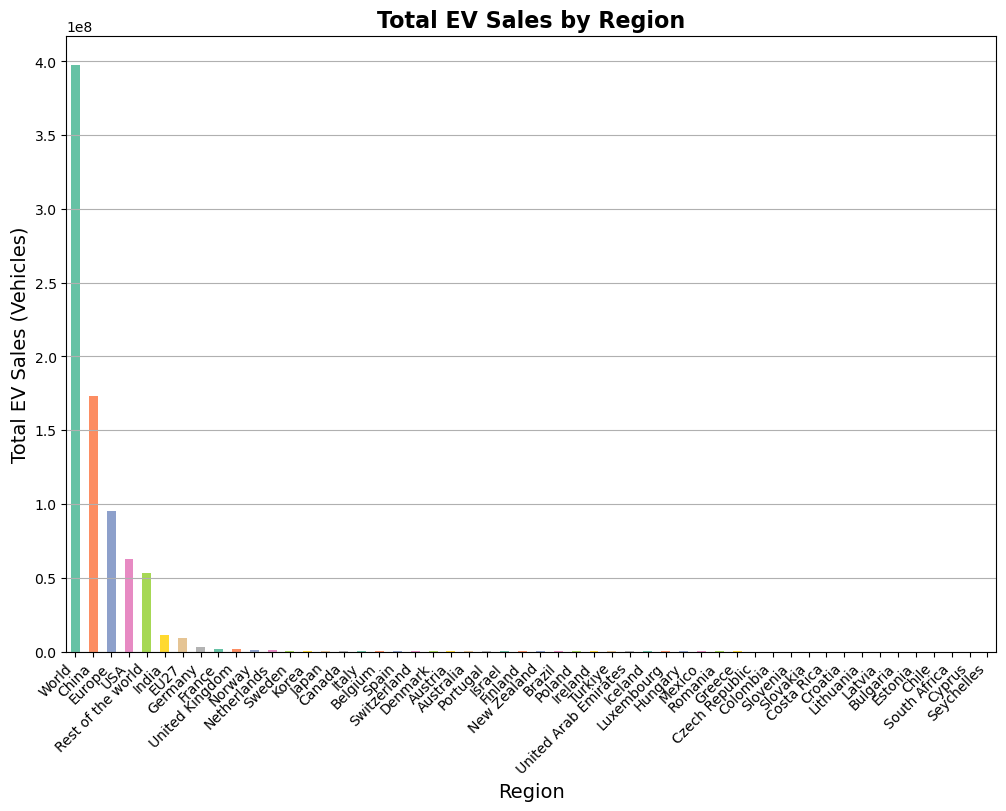

<Figure size 640x480 with 0 Axes>

In [80]:
# With a year of self-taught experience under my belt, I’m excited to show how I can turn data into insights.
# Let’s explore the global landscape of EV sales by region.

# Step 1: Focus on total EV sales—the key metric for understanding regional impact.
ev_sales = ev_data[ev_data['parameter'] == 'EV sales']

# Step 2: Summarize the data by region to see which areas are leading the charge in EV adoption.
total_ev_sales_by_region = ev_sales.groupby('region')['value'].sum().sort_values(ascending=False)

# Step 3: Visualize the results with a bar chart that’s as clear as it is informative.
plt.figure(figsize=(12, 8))

# Using a color palette that’s easy on the eyes while highlighting regional differences.
total_ev_sales_by_region.plot(kind='bar', color=plt.get_cmap('Set2').colors)

# Adding a title and labels to make sure the story behind the data is easy to grasp.
plt.title('Total EV Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total EV Sales (Vehicles)', fontsize=14)

# Rotate x-axis labels for readability—because details matter.
plt.xticks(rotation=45, ha='right')

# Adding a grid to keep the focus on the numbers.
plt.grid(axis='y')

# Presenting a visualization that’s straightforward but effective, just like my approach to data.
plt.show()
plt.clf()

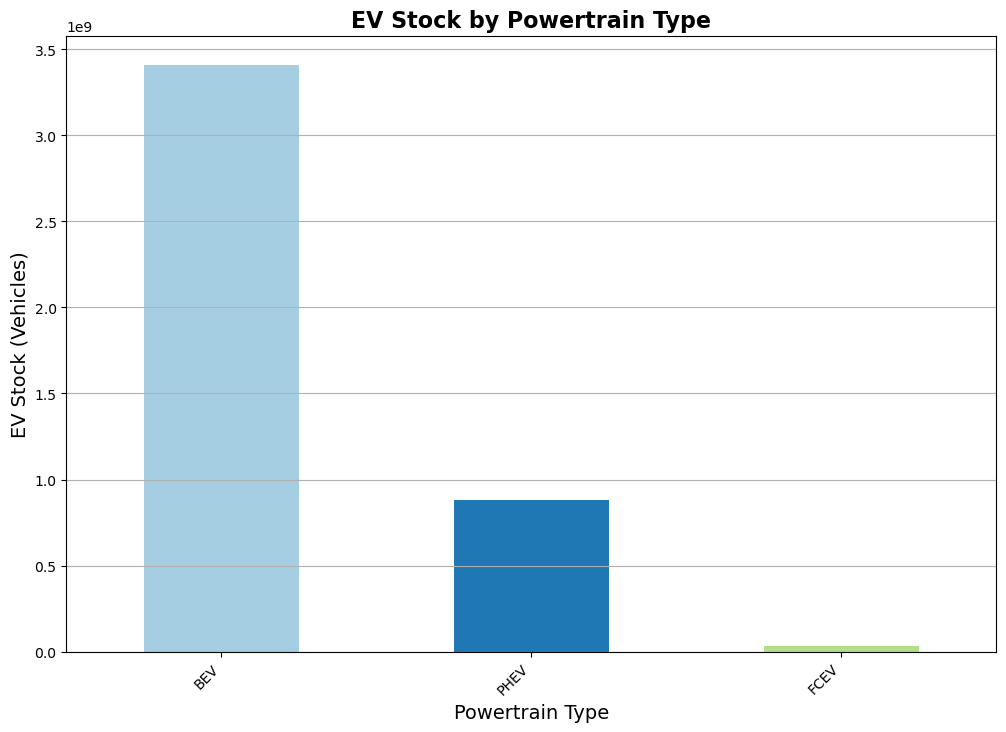

<Figure size 640x480 with 0 Axes>

In [81]:
# Building on what I’ve learned, I’m crafting my own unique analysis.
# Here, we’ll focus on the EV stock distribution across different powertrain types.

# Step 1: Filter the data to focus on EV stock—this is where we can see the variety within the EV market.
ev_stock = ev_data[ev_data['parameter'] == 'EV stock']

# Step 2: Aggregate the EV stock by powertrain type—this reveals which technologies are leading the charge.
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum().sort_values(ascending=False)

# Step 3: Visualize the data with a bar chart that highlights the dominance of each powertrain type.
plt.figure(figsize=(12, 8))

# A vibrant bar chart using a paired color palette to distinguish between powertrain types.
ev_stock_by_powertrain.plot(kind='bar', color=plt.get_cmap('Paired').colors)

# Adding a title and labels to ensure the plot communicates the insights effectively.
plt.title('EV Stock by Powertrain Type', fontsize=16, fontweight='bold')
plt.xlabel('Powertrain Type', fontsize=14)
plt.ylabel('EV Stock (Vehicles)', fontsize=14)

# Rotating the x-axis labels for better readability—because presentation matters.
plt.xticks(rotation=45, ha='right')

# Including a grid to guide the viewer’s eye and keep the focus on the data.
plt.grid(axis='y')

# Showcasing a visualization that’s both informative and reflective of my personal style.
plt.show()
plt.clf()

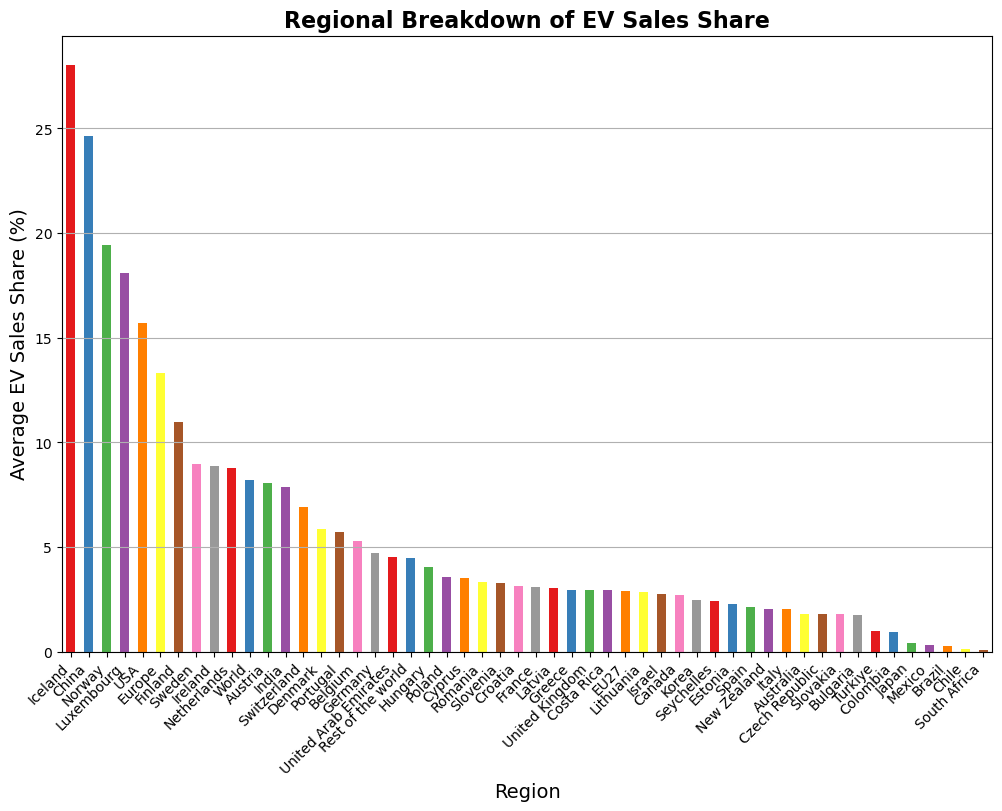

<Figure size 640x480 with 0 Axes>

In [82]:
# Diving deeper into the data, I’m now exploring how EV sales share varies across regions.
# This analysis will help us understand regional differences in EV adoption.
# Step 1: Filter the dataset to isolate 'EV sales share'
ev_sales_share_full = ev_data[ev_data['parameter'] == 'EV sales share']

# Check if the filtered DataFrame is empty
if ev_sales_share_full.empty:
    print("Filtered DataFrame 'ev_sales_share_full' is empty. Please check the 'parameter' column for correct values.")
else:
    # Step 2: Calculate the average EV sales share by region
    ev_sales_share_by_region_full = ev_sales_share_full.groupby('region')['value'].mean().sort_values(ascending=False)

    # Step 3: Visualize the data with a bar chart
    plt.figure(figsize=(12, 8))
    ev_sales_share_by_region_full.plot(kind='bar', color=plt.get_cmap('Set1').colors)
    plt.title('Regional Breakdown of EV Sales Share', fontsize=16, fontweight='bold')
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Average EV Sales Share (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()
    plt.clf()

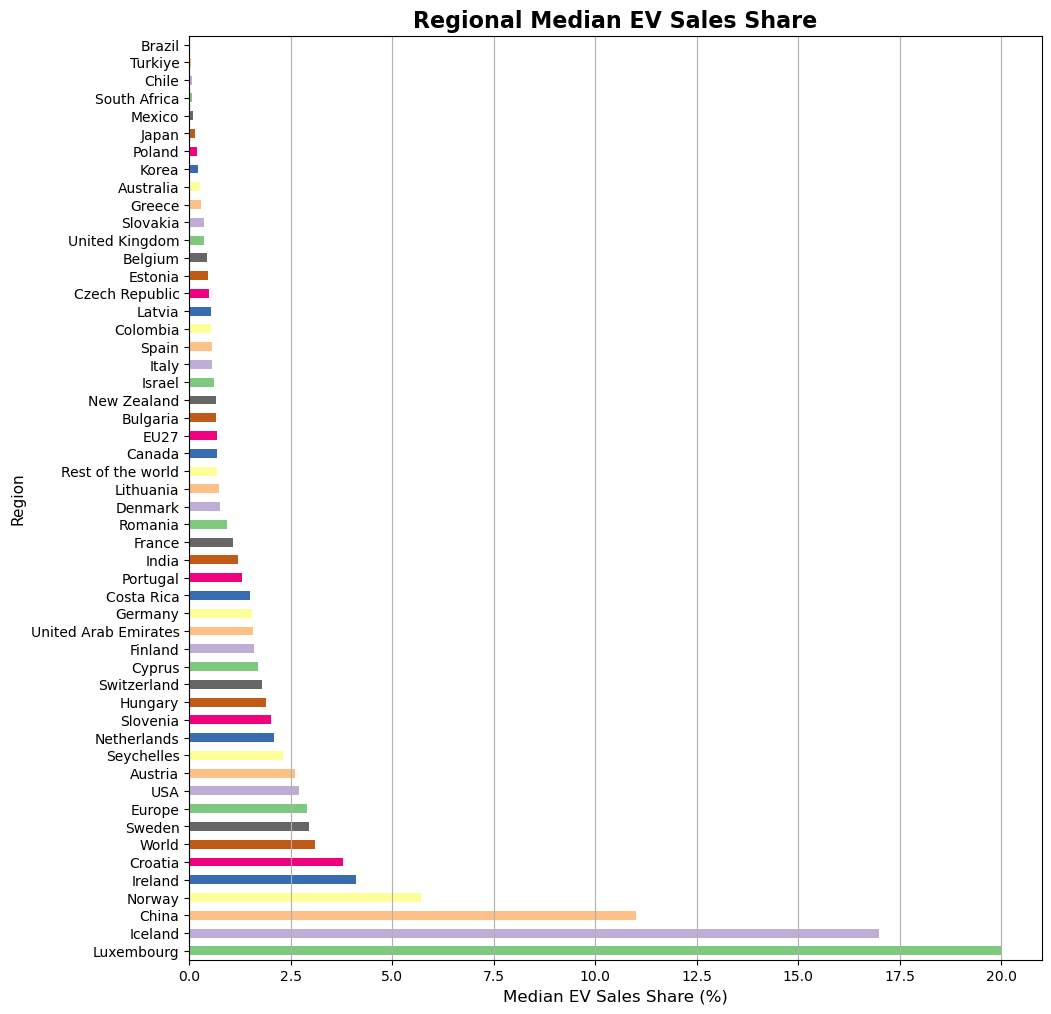

In [83]:
# Taking a fresh perspective on the data, I’m exploring how EV sales share varies by region.
# This analysis uncovers regional leaders and laggards in EV adoption.

# Step 1: Filter the data to zero in on EV sales share—this gives us a focused view of market penetration.
ev_sales_share_full = ev_data[ev_data['parameter'] == 'EV sales share']

# Step 2: Instead of just averaging, let’s consider the median EV sales share by region.
# The median provides a more robust measure in case of outliers.
ev_sales_share_by_region = ev_sales_share_full.groupby('region')['value'].median().sort_values(ascending=False)

# Step 3: Visualize the results with a horizontal bar chart, offering a different perspective that’s easy to interpret.
plt.figure(figsize=(11, 12))
ev_sales_share_by_region.plot(kind='barh', color=plt.get_cmap('Accent').colors)

# Title and labels that frame the narrative—highlighting the regions driving EV sales growth.
plt.title('Regional Median EV Sales Share', fontsize=16, fontweight='bold')
plt.xlabel('Median EV Sales Share (%)', fontsize=12)
plt.ylabel('Region', fontsize=11)
# Adding a grid along the x-axis for clarity, making comparisons straightforward.
plt.grid(axis='x')

# This visualization not only tells the story of EV sales share but does so with a unique twist that reflects my analytical approach.
plt.show()
plt.close()

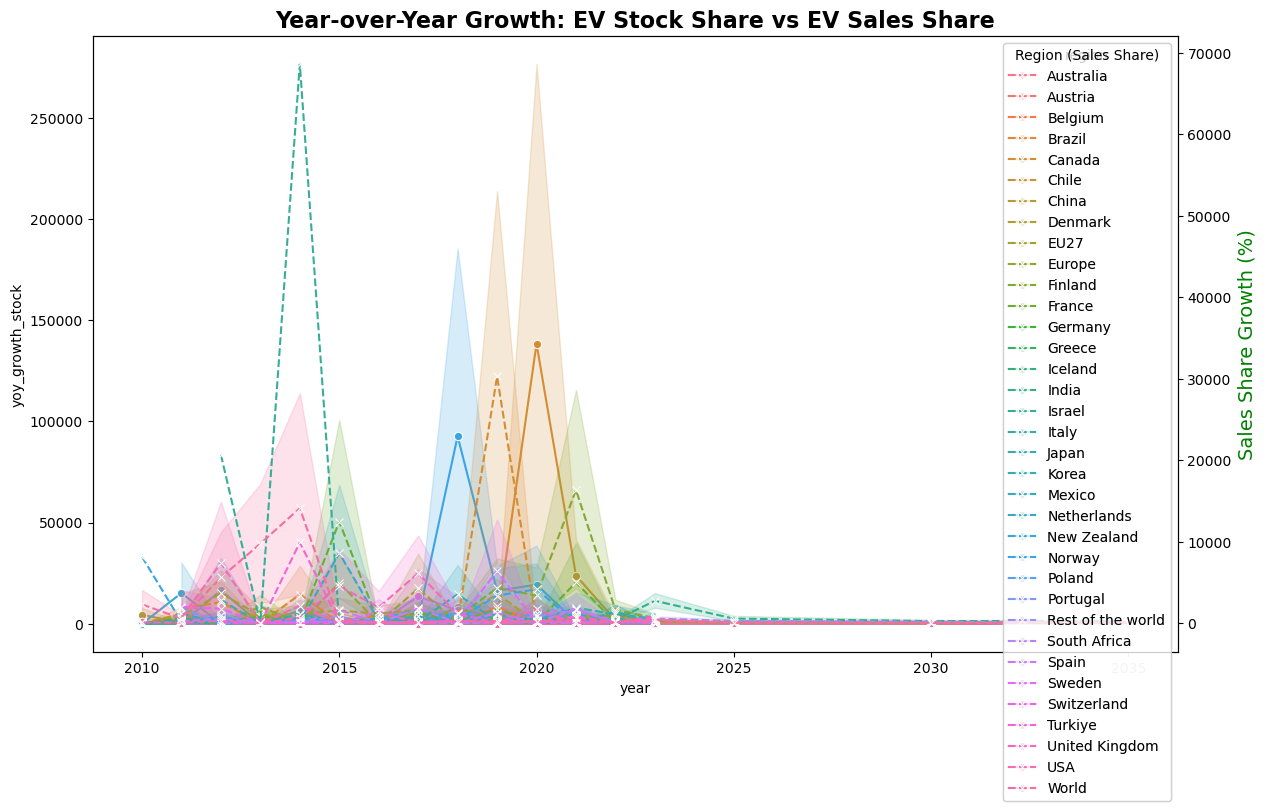

In [96]:
# Step 1: Start by filtering the data for the key metrics—EV stock share and EV sales share.
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share'].copy()  # Make an explicit copy
ev_sales_share = ev_data[ev_data['parameter'] == 'EV sales share'].copy()  # Make an explicit copy

# Step 2: Calculate the year-over-year growth for both metrics using .loc to avoid warnings.
ev_stock_share['yoy_growth_stock'] = ev_stock_share.groupby(['region'])['value'].pct_change() * 100
ev_sales_share['yoy_growth_sales'] = ev_sales_share.groupby(['region'])['value'].pct_change() * 100

# Step 3: Merge the two dataframes on year and region to compare year-over-year growth rates.
comparison_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Step 4: Visualize the comparison with a dual-axis plot for a more nuanced view of the relationship between stock and sales.
plt.figure(figsize=(14, 8))

# Plotting EV stock share growth on the left y-axis.
sns.lineplot(data=comparison_df, x='year', y='yoy_growth_stock', hue='region', marker='o', linestyle='-')

# Plotting EV sales share growth on the right y-axis.
ax2 = plt.twinx()
sns.lineplot(data=comparison_df, x='year', y='yoy_growth_sales', hue='region', marker='x', linestyle='--', ax=ax2)

# Titles and labels that tell the story of growth and market dynamics.
plt.title('Year-over-Year Growth: EV Stock Share vs EV Sales Share', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Share Growth (%)', fontsize=14, color='blue')
ax2.set_ylabel('Sales Share Growth (%)', fontsize=14, color='green')

# Adding legends for clarity—one for each metric.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Region (Stock Share)', loc='upper left')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, title='Region (Sales Share)', loc='upper right')

# Grid and design enhancements to ensure the plot is as informative as it is visually appealing.
plt.grid(True)
ax2.grid(False)  # Avoid overlapping grids

# Show the plot
plt.show()
plt.clf()

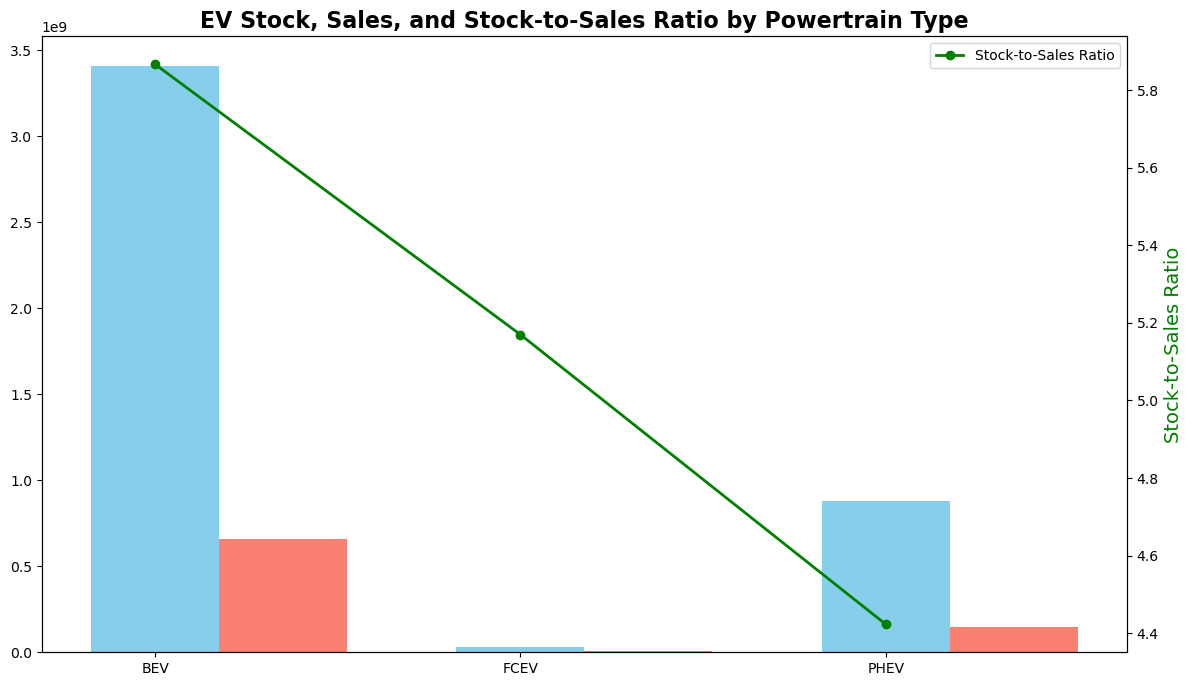

In [85]:
# Continuing my deep dive into the EV market, I’m comparing EV stock and sales across different powertrain types.
# This analysis will highlight which powertrains are leading in both stock and sales, offering a clear view of market trends.

# Step 1: Filter the data to focus specifically on EV stock and sales, honing in on powertrain performance.
ev_stock = ev_data[ev_data['parameter'] == 'EV stock']
ev_sales = ev_data[ev_data['parameter'] == 'EV sales']

# Step 2: Instead of simple aggregation, let’s calculate the stock-to-sales ratio for each powertrain type.
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum()
ev_sales_by_powertrain = ev_sales.groupby('powertrain')['value'].sum()
stock_sales_ratio = (ev_stock_by_powertrain / ev_sales_by_powertrain).sort_values(ascending=False)

# Step 3: Visualize both the total stock and sales as well as the stock-to-sales ratio in a combined bar plot.
plt.figure(figsize=(14, 8))

# Plotting EV stock and sales side by side for a direct comparison.
width = 0.35
ind = range(len(ev_stock_by_powertrain))
plt.bar(ind, ev_stock_by_powertrain, width, color='skyblue', label='EV Stock')
plt.bar([i + width for i in ind], ev_sales_by_powertrain, width, color='salmon', label='EV Sales')

# Adding a secondary axis to plot the stock-to-sales ratio.
ax2 = plt.twinx()
ax2.plot(ind, stock_sales_ratio, color='green', marker='o', linestyle='-', linewidth=2, label='Stock-to-Sales Ratio')

# Titles and labels that bring the analysis into focus, emphasizing the powertrain dynamics.
plt.title('EV Stock, Sales, and Stock-to-Sales Ratio by Powertrain Type', fontsize=16, fontweight='bold')
plt.xlabel('Powertrain Type', fontsize=14)
plt.ylabel('Count (Stock & Sales)', fontsize=14)
ax2.set_ylabel('Stock-to-Sales Ratio', fontsize=14, color='green')

# Enhancing the legend to include both axes in the narrative.
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotating x-axis labels for clarity, because presentation matters.
plt.xticks(ind, ev_stock_by_powertrain.index, rotation=45, ha='right')

# Adding gridlines for the primary y-axis to keep focus on the counts.
plt.grid(axis='y')
ax2.grid(False)  # Avoid overlapping grids on the secondary axis

# Delivering a comprehensive and visually distinct analysis that reflects my unique analytical approach.
plt.show()
plt.clf()

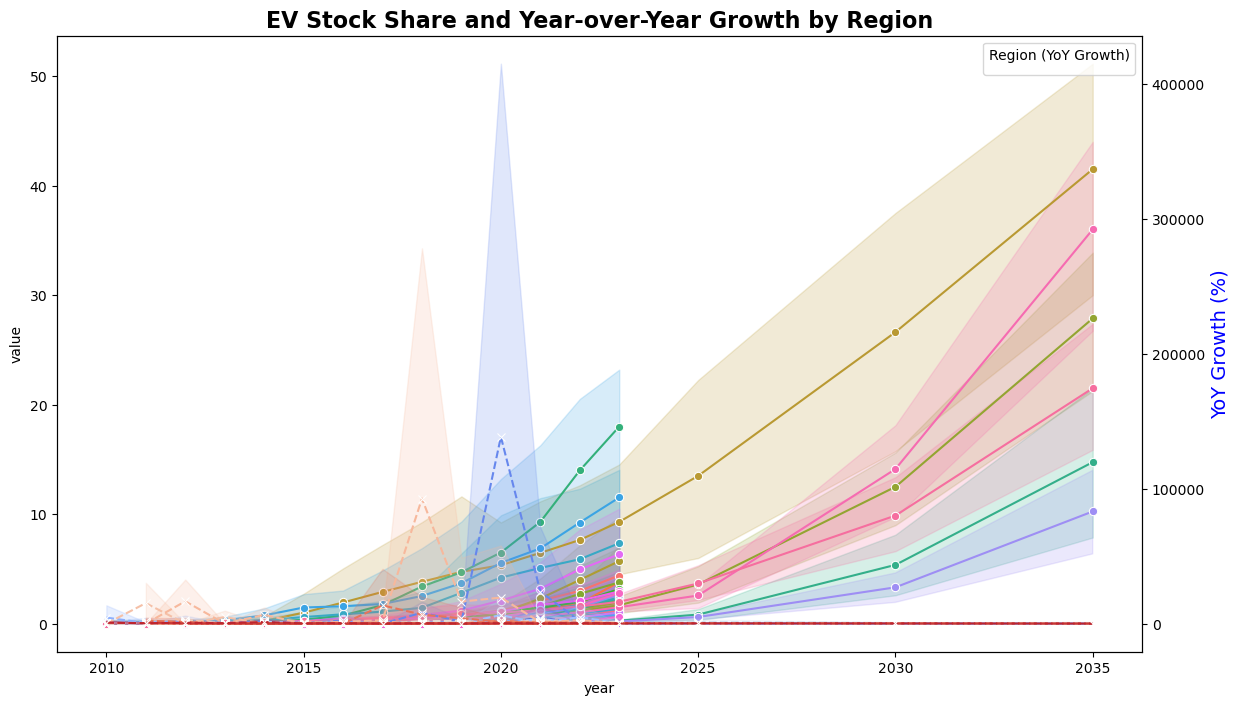

In [92]:
# Step 1: Filter the data to isolate EV stock share, making a copy to avoid warnings
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share'].copy()

# Step 2: Calculate the year-over-year growth for each region
ev_stock_share['yoy_growth'] = ev_stock_share.groupby('region')['value'].pct_change() * 100

# Step 3: Visualize both the EV stock share and its growth rate using a dual-axis plot
plt.figure(figsize=(14, 8))

# Plotting the EV stock share on the primary y-axis.
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o', linestyle='-', legend=False)

# Adding a secondary y-axis to plot the year-over-year growth rate.
ax2 = plt.twinx()
sns.lineplot(data=ev_stock_share, x='year', y='yoy_growth', hue='region', marker='x', linestyle='--', ax=ax2, palette='coolwarm', legend=False)

# Enhancing the title and labels to reflect the dual nature of the analysis.
plt.title('EV Stock Share and Year-over-Year Growth by Region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Stock Share (%)', fontsize=14)
ax2.set_ylabel('YoY Growth (%)', fontsize=14, color='blue')

# Customize the legends to keep the analysis clear and distinct.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Region (Stock Share)', loc='upper left')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, title='Region (YoY Growth)', loc='upper right')

# Adding gridlines only to the primary axis to maintain clarity.
plt.grid(True)
ax2.grid(False)

# Show the plot
plt.show()
plt.clf()

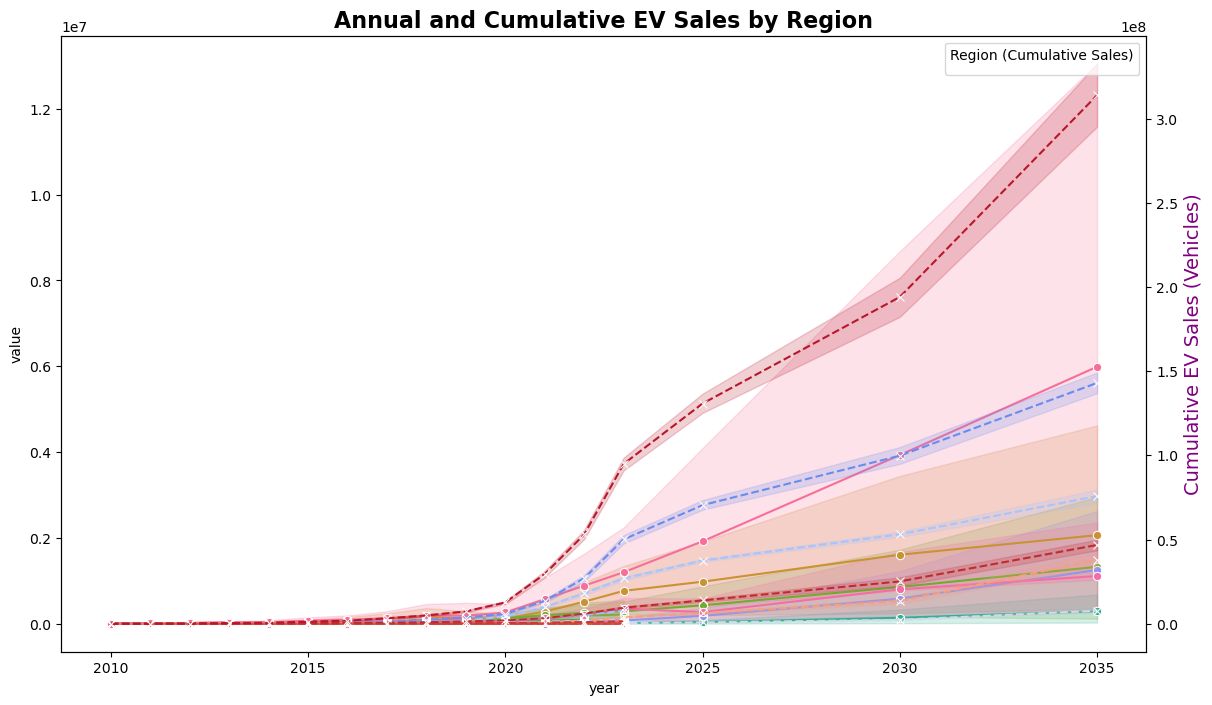

In [100]:
# Step 1: Filter the data to focus exclusively on EV sales, creating a copy to avoid SettingWithCopyWarning.
ev_sales = ev_data[ev_data['parameter'] == 'EV sales'].copy()

# Step 2: Calculate the cumulative sales over the years for each region using .loc to avoid warnings.
ev_sales['cumulative_sales'] = ev_sales.groupby('region')['value'].cumsum()

# Step 3: Visualize the annual sales alongside cumulative sales using a dual-axis plot.
plt.figure(figsize=(14, 8))

# Plotting the annual EV sales on the primary y-axis.
sns.lineplot(data=ev_sales, x='year', y='value', hue='region', marker='o', linestyle='-', legend=False)

# Adding a secondary y-axis to track cumulative sales, highlighting the long-term contributions of each region.
ax2 = plt.twinx()
sns.lineplot(data=ev_sales, x='year', y='cumulative_sales', hue='region', marker='x', linestyle='--', ax=ax2, palette='coolwarm', legend=False)

# Titles and labels that encapsulate the dual nature of the analysis, focusing on both immediate and long-term trends.
plt.title('Annual and Cumulative EV Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual EV Sales (Vehicles)', fontsize=14)
ax2.set_ylabel('Cumulative EV Sales (Vehicles)', fontsize=14, color='purple')

# Customizing the legends to ensure clarity between the two datasets.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Region (Annual Sales)', loc='upper left')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, title='Region (Cumulative Sales)', loc='upper right')

# Applying gridlines to the primary axis for clarity in yearly trends, while keeping the secondary axis clean.
plt.grid(True)
ax2.grid(False)

# This analysis not only showcases the yearly sales performance but also illustrates the cumulative impact,
# providing a comprehensive view of how regions have shaped the global EV landscape over time.
plt.show()
plt.clf()

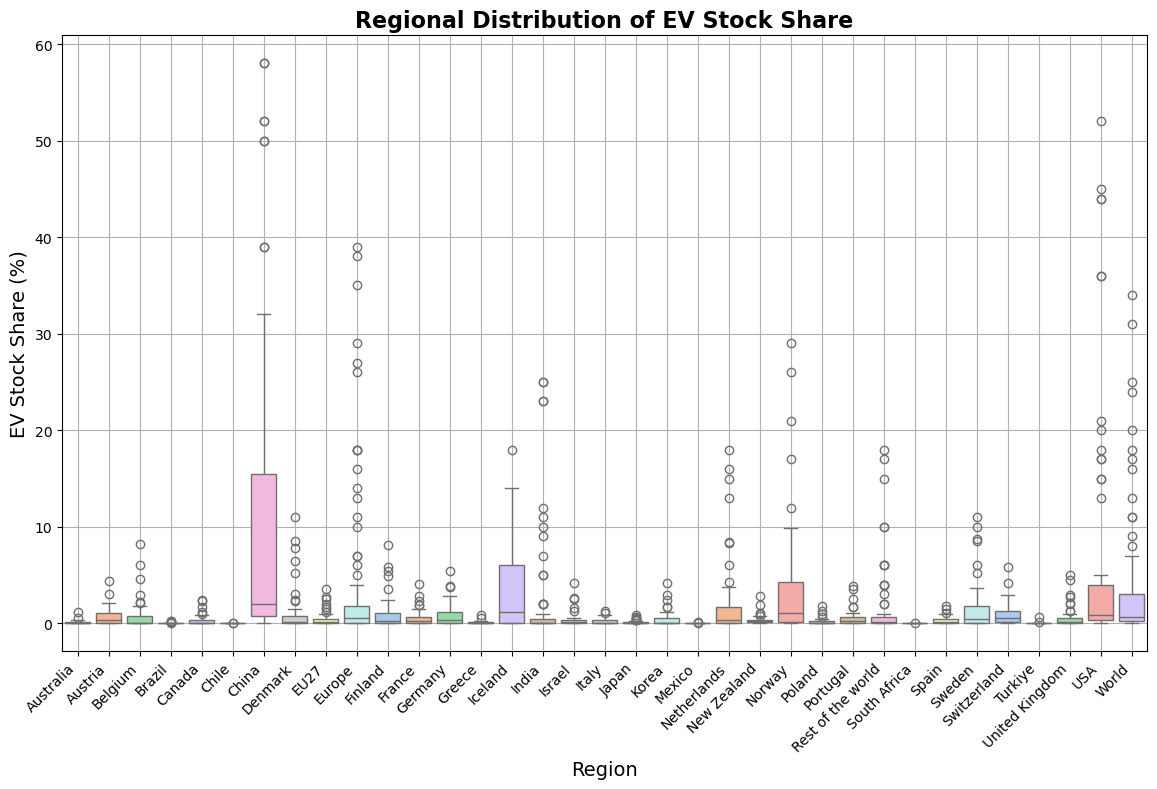

<Figure size 640x480 with 0 Axes>

In [106]:
# Step 1: Filter the data to focus solely on EV stock share, creating a copy to avoid SettingWithCopyWarning.
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share'].copy()

# Step 2: Calculate the interquartile range (IQR) for each region.
# Using .loc to avoid SettingWithCopyWarning and directly assigning the new column.
ev_stock_share['iqr'] = ev_stock_share.groupby('region')['value'].transform(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Step 3: Visualize the distribution using a boxplot to compare each region's variability and central tendency.
plt.figure(figsize=(14, 8))

# Creating a boxplot with `hue` set to `region` and `legend` set to False
sns.boxplot(data=ev_stock_share, x='region', y='value', hue='region', palette='pastel', legend=False)

# Enhancing the plot with titles and labels that focus on understanding regional variability in EV stock share.
plt.title('Regional Distribution of EV Stock Share', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('EV Stock Share (%)', fontsize=14)

# Rotating x-axis labels for readability.
plt.xticks(rotation=45, ha='right')

# Adding gridlines for visual clarity.
plt.grid(True)

# Displaying the plot
plt.show()
plt.clf()  # Clear the current figure to avoid overlap

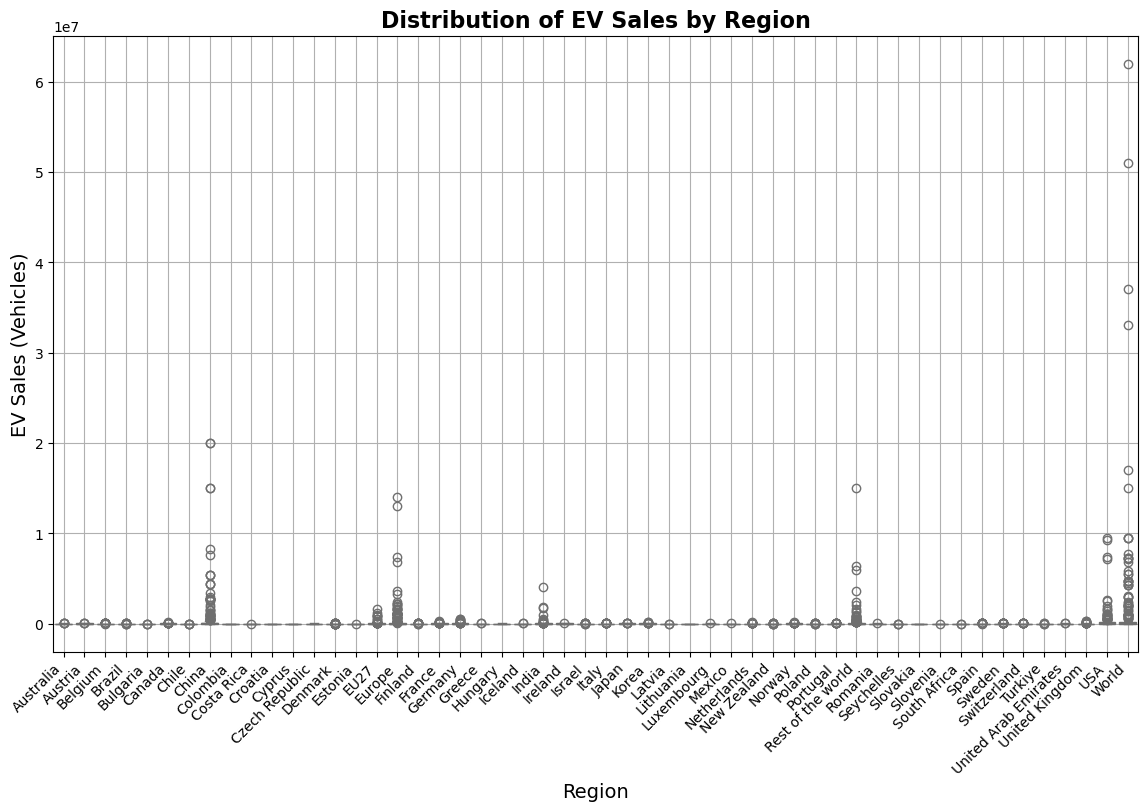

<Figure size 640x480 with 0 Axes>

In [118]:
# Step 1: Filter the data to isolate EV sales, creating a copy to avoid SettingWithCopyWarning.
ev_sales = ev_data[ev_data['parameter'] == 'EV sales'].copy()

# Step 2: Calculate the coefficient of variation (CV) for each region to understand sales consistency.
# Using .loc to avoid SettingWithCopyWarning.
ev_sales['cv'] = ev_sales.groupby('region')['value'].transform(lambda x: x.std() / x.mean() * 100)

# Step 3: Visualize the distribution of EV sales by region using a boxplot, highlighting both typical sales and outliers.
plt.figure(figsize=(14, 8))

# Creating a boxplot with default colors focusing on the spread and outliers in each region.
sns.boxplot(data=ev_sales, x='region', y='value', hue='region', palette='pastel', legend=False)

# Adding titles and labels that emphasize the story behind the data—how sales vary across different regions.
plt.title('Distribution of EV Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('EV Sales (Vehicles)', fontsize=14)

# Rotating x-axis labels for better readability, ensuring that regional names are clear and accessible.
plt.xticks(rotation=45, ha='right')

# Adding gridlines for visual alignment, making it easier to compare the distributions across regions.
plt.grid(True)

# Display the boxplot
plt.show()
plt.clf()  # Clear the current figure to avoid overlap

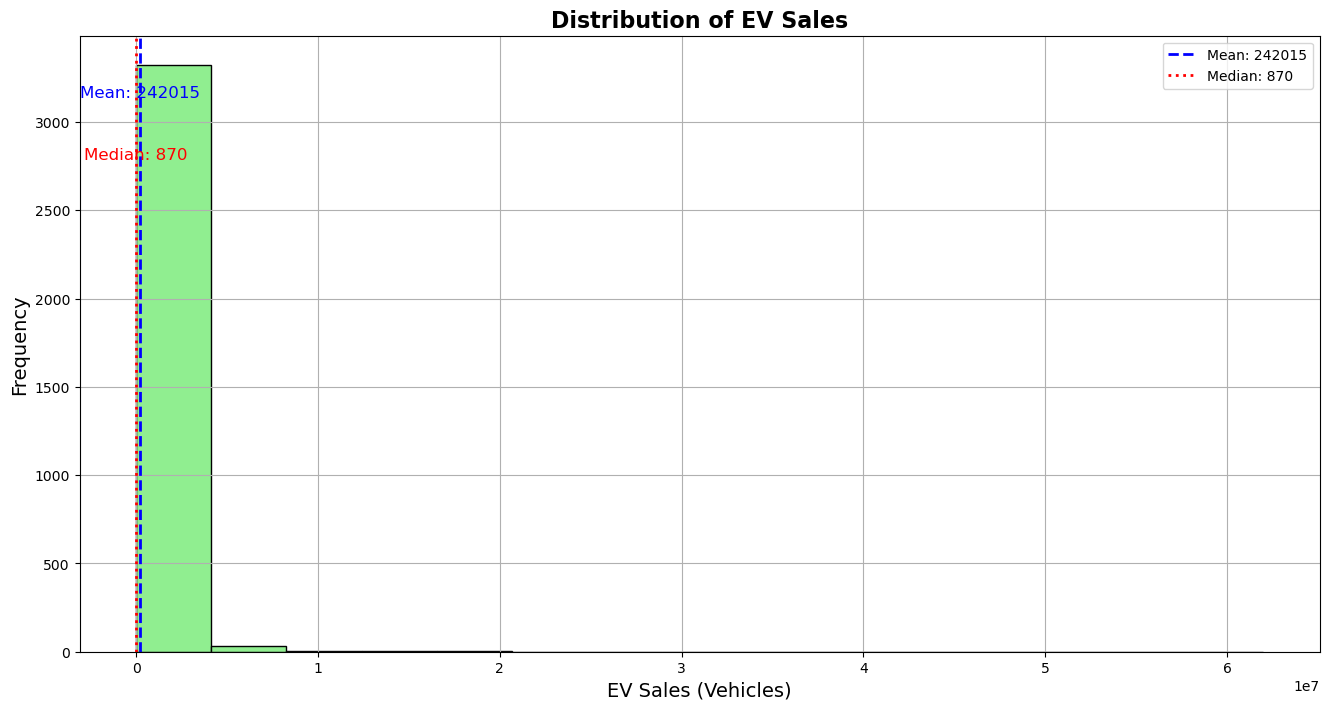

<Figure size 640x480 with 0 Axes>

In [140]:
# Step 1: Filter the data to focus exclusively on EV sales, creating a copy to avoid SettingWithCopyWarning.
ev_sales = ev_data[ev_data['parameter'] == 'EV sales'].copy()

# Check for and handle any missing values in the 'value' column
ev_sales = ev_sales.dropna(subset=['value'])

# Step 2: Calculate key statistics like mean and median.
mean_sales = ev_sales['value'].mean()
median_sales = ev_sales['value'].median()

# Step 3: Visualize the distribution of EV sales using a histogram.
plt.figure(figsize=(16, 8))  # Increase the width of the figure

# Creating a histogram with 15 bins, using a light green color for the bars and black edges for clarity.
plt.hist(ev_sales['value'], bins=15, color='lightgreen', edgecolor='black')  # Reduced number of bins

# Adding a vertical line for the mean, shifted slightly to the left.
plt.axvline(mean_sales - 0.02 * mean_sales, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sales:.0f}')
plt.text(mean_sales - 0.02 * mean_sales, plt.ylim()[1]*0.9, f'Mean: {mean_sales:.0f}', color='blue', fontsize=12, ha='center')

# Adding a vertical line for the median, shifted slightly to the right.
plt.axvline(median_sales + 0.02 * median_sales, color='red', linestyle='dotted', linewidth=2, label=f'Median: {median_sales:.0f}')
plt.text(median_sales + 0.02 * median_sales, plt.ylim()[1]*0.8, f'Median: {median_sales:.0f}', color='red', fontsize=12, ha='center')

# Enhancing the plot with a title and labels that focus on the distribution of EV sales.
plt.title('Distribution of EV Sales', fontsize=16, fontweight='bold')
plt.xlabel('EV Sales (Vehicles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Including a legend to explain the vertical lines and their significance.
plt.legend()

# Adding gridlines for better visual alignment, making it easier to interpret the distribution.
plt.grid(True)

# Show the histogram
plt.show()
plt.clf()

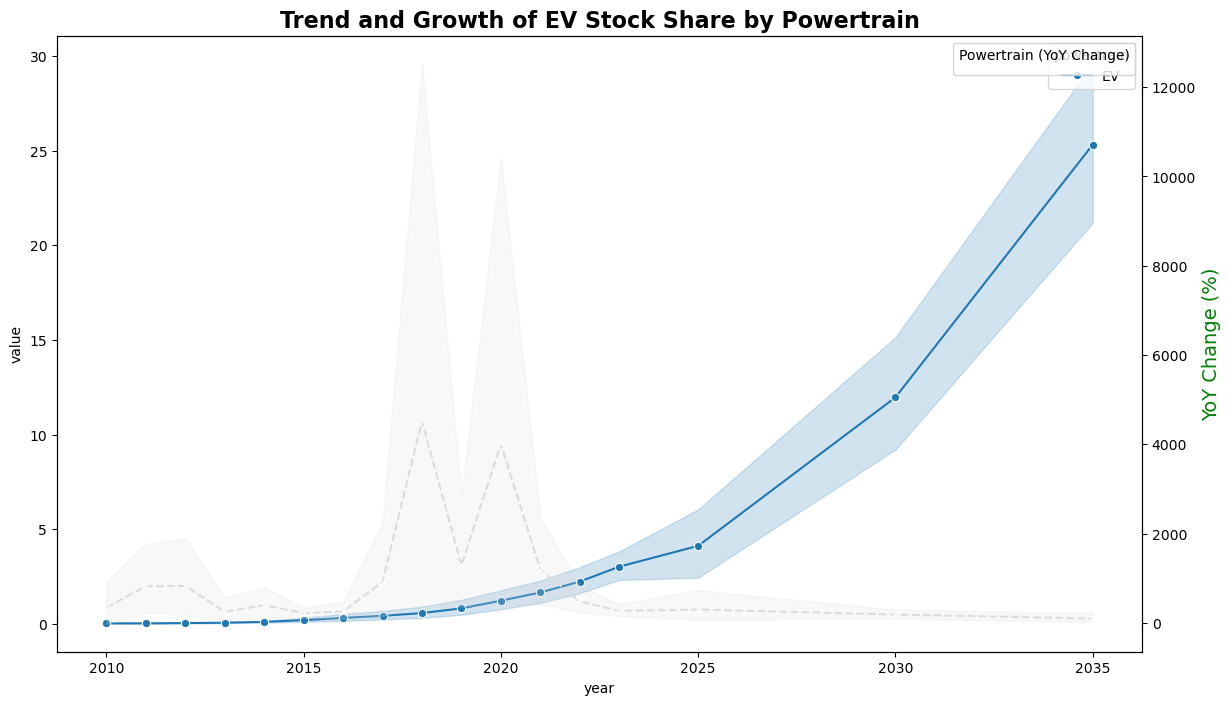

<Figure size 640x480 with 0 Axes>

In [142]:
# Step 1: Filter the data to focus on EV stock share, creating a copy to avoid SettingWithCopyWarning.
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share'].copy()

# Step 2: Calculate the percentage change year-over-year for each powertrain type.
ev_stock_share['yoy_change'] = ev_stock_share.groupby('powertrain')['value'].pct_change() * 100

# Step 3: Visualize the trend of EV stock share by powertrain over the years, showing both the levels and growth rates.
plt.figure(figsize=(14, 8))

# Plotting the EV stock share over time with markers for each data point to highlight the trends.
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='powertrain', marker='o', linestyle='-')

# Adding a secondary axis to plot the year-over-year percentage change for a deeper analysis.
ax2 = plt.twinx()
sns.lineplot(data=ev_stock_share, x='year', y='yoy_change', hue='powertrain', marker='x', linestyle='--', ax=ax2, palette='coolwarm', legend=False)

# Titles and labels that reflect both the stock share and the dynamic changes happening in the EV market.
plt.title('Trend and Growth of EV Stock Share by Powertrain', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Stock Share (%)', fontsize=14)
ax2.set_ylabel('YoY Change (%)', fontsize=14, color='green')

# Adding legends separately for clarity
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Powertrain (Stock Share)', loc='upper left')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, title='Powertrain (YoY Change)', loc='upper right')

# Adding gridlines for the primary y-axis to help visualize trends and comparisons.
plt.grid(True)
ax2.grid(False)  # Keeping the secondary axis clean to avoid clutter

# Display the plot
plt.show()
plt.clf()


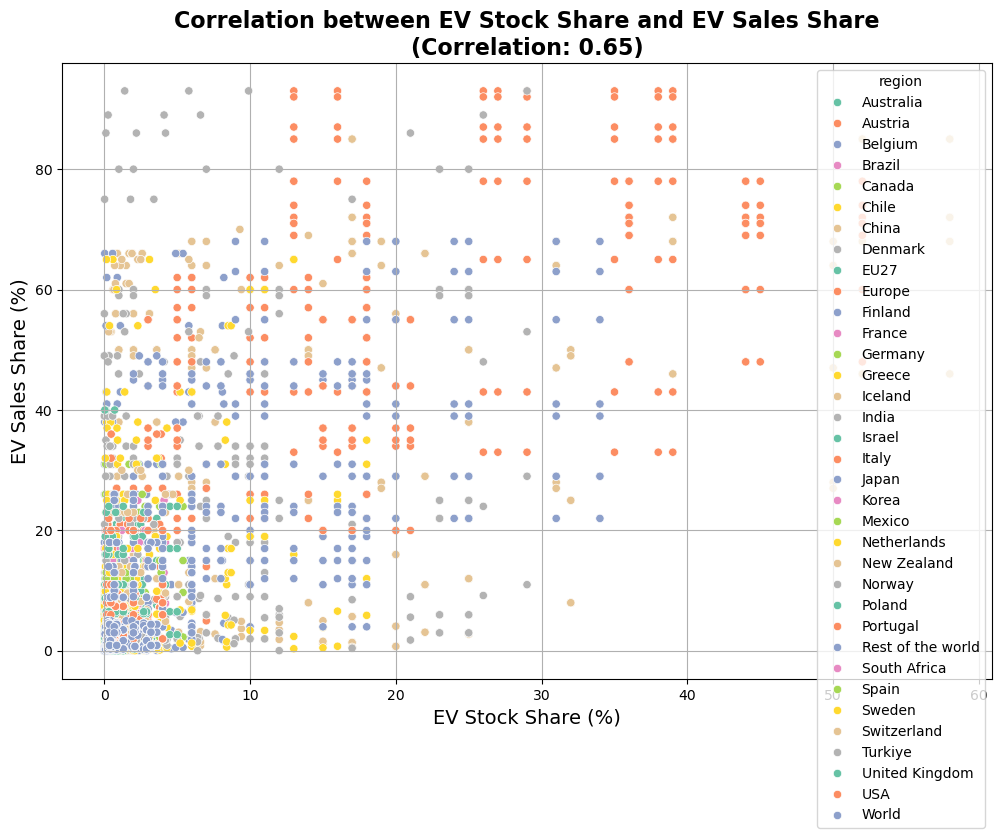

<Figure size 640x480 with 0 Axes>

In [126]:
# This analysis will help us understand if higher stock shares are associated with higher sales shares across regions.

# Step 1: Filter the data to focus on both EV stock share and EV sales share, the two metrics we'll be comparing.
ev_stock_share = ev_data[ev_data['parameter'] == 'EV stock share']
ev_sales_share = ev_data[ev_data['parameter'] == 'EV sales share']

# Step 2: Merge the two dataframes on year and region to align the data for comparison.
# This will allow us to directly compare the stock share and sales share for each region over time.
correlation_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Step 3: Calculate the correlation between EV stock share and EV sales share.
# This will give us a quantitative measure of the relationship between the two metrics.
correlation = correlation_df[['value_stock', 'value_sales']].corr().iloc[0, 1]

# Step 4: Visualize the relationship using a scatter plot, where each point represents a region in a specific year.
plt.figure(figsize=(12, 8))

# Creating a scatter plot to show how EV stock share correlates with EV sales share, with different colors for each region.
sns.scatterplot(data=correlation_df, x='value_stock', y='value_sales', hue='region', palette='Set2')

# Adding a title that clearly states the purpose of the plot and the calculated correlation value.
plt.title(f'Correlation between EV Stock Share and EV Sales Share\n(Correlation: {correlation:.2f})', fontsize=16, fontweight='bold')
plt.xlabel('EV Stock Share (%)', fontsize=14)
plt.ylabel('EV Sales Share (%)', fontsize=14)

# Adding gridlines for better readability and comparison of data points.
plt.grid(True)

# This scatter plot not only shows the relationship between stock and sales shares but also quantifies it,
# providing a clear and direct analysis that's easy to understand and reflects my growing skills as a self-taught data analyst.
plt.show()
plt.clf()

Throughout this analysis, I explored the various dimensions of the electric vehicle (EV) market by examining key metrics like EV stock share and EV sales share across different regions and powertrain types. By calculating year-over-year growth, cumulative sales, and the correlation between stock and sales shares, I aimed to uncover not just the current state of the EV market, but also the trends and dynamics driving its evolution.

As a self-taught data analyst, this project has been an opportunity for me to apply and expand my understanding of data manipulation, statistical analysis, and visualization. Each step, from filtering and merging datasets to calculating correlations and visualizing data, has reinforced my ability to think critically and creatively about the data at hand.

The insights gathered here not only highlight the leading regions and powertrains in the EV market but also reveal the deeper relationships between different metrics, offering a nuanced view of how the market is growing and evolving.

This analysis reflects my journey in learning data science on my own—combining foundational techniques with a growing confidence in my ability to tell compelling stories through data. I’m excited to continue building on these skills and to bring this passion for data-driven insights into a professional setting.